# Importing a CSV File to PostgreSQL

- Please note that this method will only allow you to import csv files one by one to PostgreSQL not SQL Server or MySQL.
- To see how to upload a csv file to SQL Server: <a href="https://github.com/dhakshanayashwanth/Uploading_Data_to_SQL_Server/blob/main/Uploading%20Data%20to%20SQL%20Server.ipynb">please click on this link.</a>

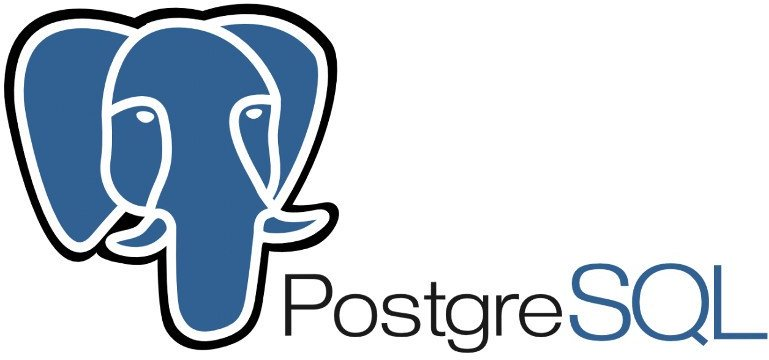

In [67]:
from IPython.display import Image
Image(filename='postgresql.jpg', width=280, height=200)

### Tools Used in This Project

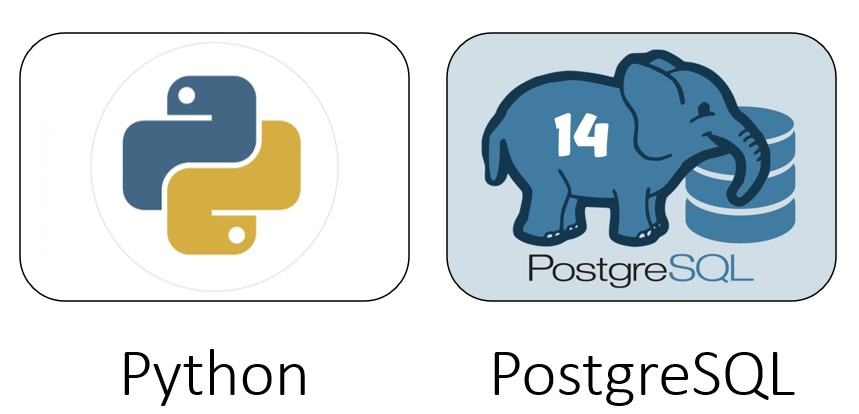

In [63]:
from IPython.display import Image
Image(filename='tools.jpg', width=400, height=200)

#### Introduction

This notebook will accomplish the following tasks:

#### Section 01: Creating an empty list and directory.

#### Section 02: Moving csv file(s) to directory.

#### Section 03: Uploading csv file(s) to PostgreSQL.

In [33]:
import os
import numpy as np
import pandas as pd
import pyodbc
import psycopg2
import subprocess

### Section 01: Creating an empty list and directory.

In [39]:
# Creating an empty list called csv_files.
csv_files = []

# Code below is saving the file name in a new list if the file names ends with a .csv 
# Code is also listing out the csv files we have. In this case, it's just one called: Most_Followed_on_Instagram.csv
for file in os.listdir(os.getcwd()):
    if file.endswith('.csv'):
        csv_files.append(file)
        print("Saved csv file..." + file)

Saved csv file...Most_Followed_on_Instagram.csv


In [40]:
# Creating a new directory called datasets.
# If this directory already exists please create a new one.
dataset_dir = 'datasets'
dataset_dir

'datasets'

### Section 02: Moving csv file(s) to directory.
### Wait STOP 🛑🛑🛑
Take the csv files you have and move them into the directory you created. In this case the datasets directory.
The code below won't work if youo don't do this.

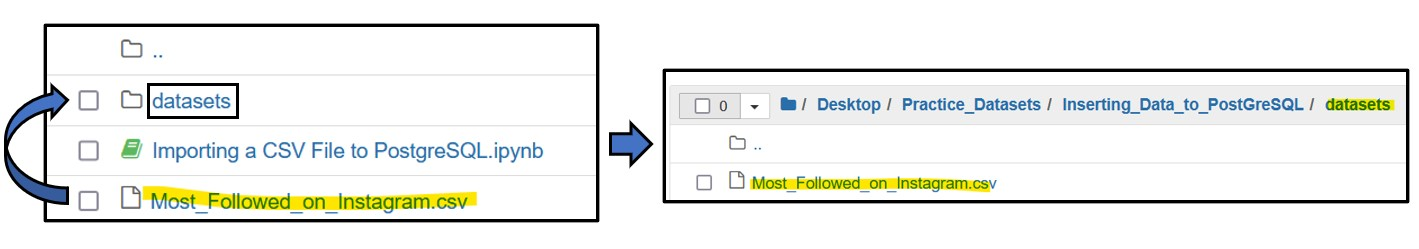

In [50]:
from IPython.display import Image
Image(filename='moving_csv_files.jpg', width=750, height=550)

In [51]:
data_path = os.getcwd()+'/'+ dataset_dir+'/'
df = {}
for file in csv_files:
    try:
        df[file] = pd.read_csv(data_path+file)
    except UnicodeDecodeError:
        df[file] = pd.read_csv(data_path+file, encoding="ISO-8859-1")
    print(file)

Most_Followed_on_Instagram.csv


### Section 03: Uploading csv file(s) to PostgreSQL.

In [68]:
for k in csv_files:
    
    dataframe = df[k] #k represents the csv file
    
    clean_tbl_name = k.lower().replace(" ", "_").replace("?", "")\
                    .replace("_","_").replace(r"/","_").replace("\\","_").replace("%","")\
                    .replace(")","").replace(r"(","").replace("$","")
    
    # Removing .csv extension from clean_tbl_name
    tbl_name = '{0}'.format(clean_tbl_name.split('.')[0])
        
    dataframe.columns = [x.lower().replace(" ", "_").replace("?","") \
                    .replace("_","_").replace(r"/","_").replace("\\","_").replace("%","")\
                    .replace(")","").replace(r"(","").replace("$","") for x in dataframe.columns]
    
    # Replacement dictionary that maps pandas dtypes to sql types.
    replacements = {
        'object': 'varchar',
        'float64': 'float',
        'int64': 'int',
        'datetime64': 'timestamp',
        'timedelta64[ns]': 'varchar'
    }
    
    # Table schema.
    col_str =",".join("{} {}".format(n,d) for (n,d) in zip(dataframe.columns, dataframe.dtypes.replace(replacements)))
    
    # Connecting to database. 
    # To get the host, dbname, user and password info just right click on the name of the server (such as PostgreSQL 14 
    # and select properties. That should give you all the info you need.)
    host = '*****'
    dbname = '*****'
    user = '*****'
    password = '*****'

    conn_string = "host=%s dbname=%s user=%s password=%s" % (host, dbname, user, password)
    conn = psycopg2.connect(conn_string)
    cursor = conn.cursor()
    print("Connected to database successfully!","\N{grinning face}")
    
    # Creating table.
    cursor.execute("drop table if exists %s;" % (tbl_name))
    cursor.execute("create table %s (%s);" % (tbl_name, col_str))
    print("Table {0} was created successfully".format(tbl_name))
    
    dataframe.to_csv(k, header=dataframe.columns, index=False, encoding='utf-8')
    my_file = open(k)
    print("File opened in memory.","\N{thinking face}")
    
    SQL_STATEMENT = """
    COPY %s FROM STDIN WITH
        CSV
        HEADER
        DELIMITER AS ','
    """
    cursor.copy_expert(sql=SQL_STATEMENT % tbl_name, file=my_file)
    print("File copied to db","\N{writing hand}")

    cursor.execute("Grant select on table %s to public" % tbl_name)
    conn.commit()
    cursor.close()
    print('Table {0} imported to db completed'.format(tbl_name))

    # for loop end message
    print('All tables have been successfully imported to db',"\N{party popper}","\N{party popper}","\N{party popper}")

Connected to database successfully! 😀
Table most_followed_on_instagram was created successfully
File opened in memory. 🤔
File copied to db ✍
Table most_followed_on_instagram imported to db completed
All tables have been successfully imported to db 🎉 🎉 🎉


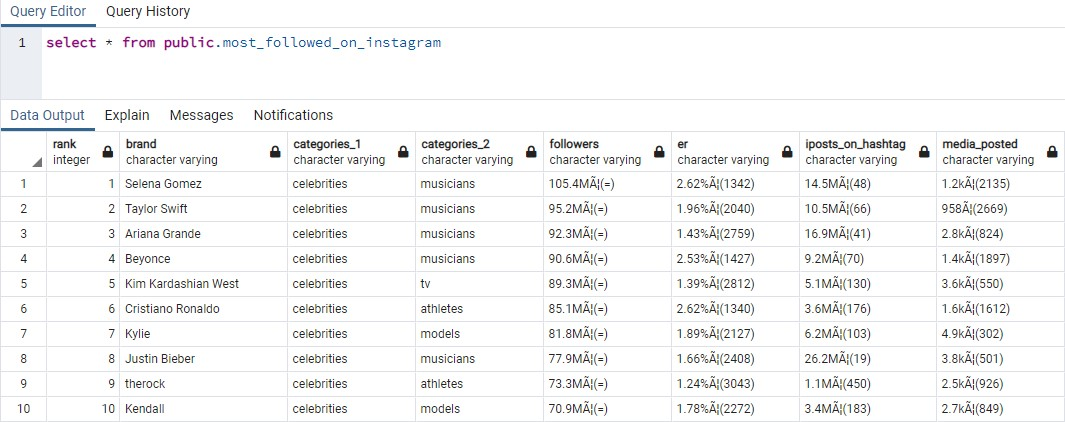

In [62]:
# Here's the table in PostgreSQL.
from IPython.display import Image
Image(filename='uploaded_data.jpg', width=750, height=150)